### Reinforcement learning

Its a type of machine learning (Part od AI as well). Learning from results and improve the methods and results. 
For example for positive changes we can assign a reward and for negative changes we can assign a punishment for humans. Simillar logic we will use in the algorithms in reinforcement learning.

##### Elements of reinforcement learning

1. Agent
Inteligent programs. Most important part.

2. Environment
Where the agent is going to work. An external condition.

3. Policy
Mapping from state to actions defining agents behaviour at a particular time.

4. Reward Function
+1 or any other value indicating good change, may be -1 for negative changes.

5. Value function
Value of a state is total amount of reward an agent can expect to accumulate over the future. May be how to maximize and minimize rewards based on changes.

6. Model of environment
Prodicting next state and reward for next state.

#### Optimal path to move from room 1 to room5

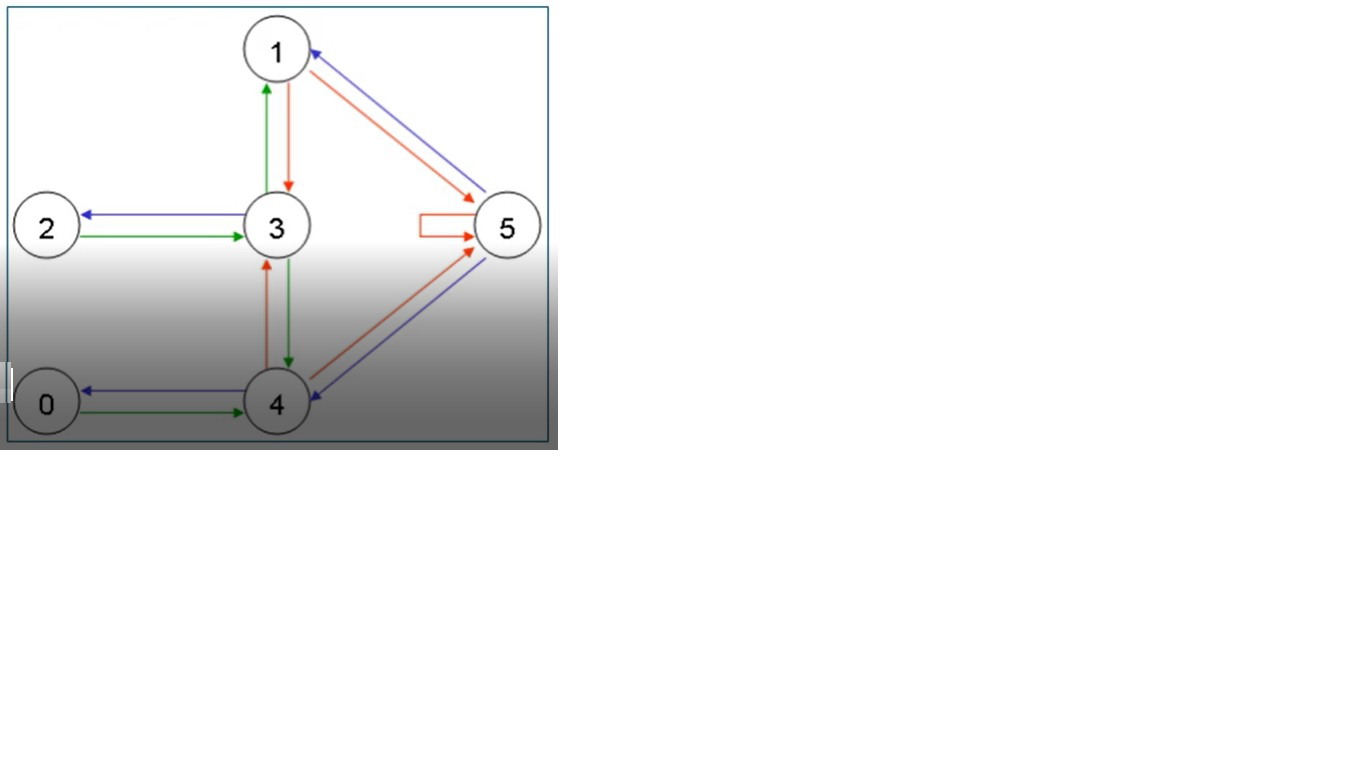

In [19]:
#Task is to find the optimal path from room 2 to 5

from PIL import Image
path = Image.open(r'C:\Users\sreeraj.va\Documents\optimal_path.jpg')
path

In [9]:
import numpy as np

R = np.matrix([[-1,-1,-1,-1,0,-1],
              [-1,-1,-1,0,-1,100],
              [-1,-1,-1,0,-1,-1],
              [-1,0,0,-1,0,-1],
              [-1,0,0,-1,-1,100],
              [-1,0,-1,-1,0,100]])
R

matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [ -1,   0,   0,  -1,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

In [10]:
Q = np.matrix(np.zeros([6,6]))
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [11]:
gamma = 0.8
initial_state = 1

In [12]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

In [14]:
#update Q matrix according to the selected and the Q learning algorithm

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action]))[1]
    if max_index.shape[0] >1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]    
    Q[current_state, action] = R[current_state, action] + gamma*max_value
update(initial_state, action, gamma)
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [15]:
# train over 10k iterations

for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, gamma)
print(Q)

[[  0.   0.   0.   0. 400.   0.]
 [  0.   0.   0. 320.   0. 500.]
 [  0.   0.   0. 320.   0.   0.]
 [  0. 400. 256.   0. 400.   0.]
 [  0. 400. 256.   0.   0. 500.]
 [  0. 400.   0.   0. 400. 500.]]


In [16]:
# normalize the trained Q matrix

print('Trained Q matrix')
print(Q/np.max(Q)*100)

Trained Q matrix
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [17]:
current_state = 2
steps = [current_state]
while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

#sequence of septs
print('Selected path:')
print(steps)

Selected path:
[2, 3, 4, 5]


##### The optimal path is 2-3-4-5